In [1]:
# Import the neccesary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('UsArrests.csv')
df.head()


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [2]:
# Check data types and dimensions of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [3]:
# Check for missing values
df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
# Drop duplicate rows
df = df.drop_duplicates()

In [5]:
# Make numerical features all float types
df["Assault"] = df["Assault"].astype("float64")
df["UrbanPop"] = df["UrbanPop"].astype("float64")
df.dtypes

City         object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

In [6]:
# Basic Statistical analysis on dataframe
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Checking number of unique values of categorical feature
print("Unique Cities: ", len(df["City"].unique()))
df["City"].unique()

Unique Cities:  50


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

<AxesSubplot:xlabel='Rape', ylabel='Density'>

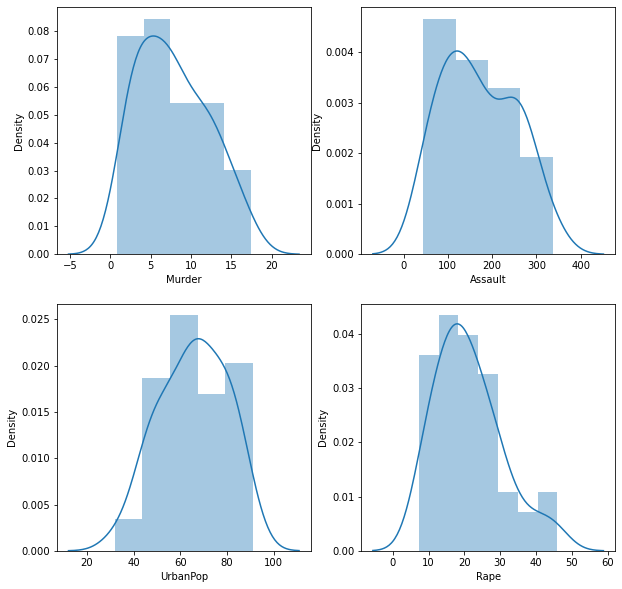

In [8]:
#Check distribution of each feature

fig, axes = plt.subplots(2, 2, figsize=(10,10))

sns.distplot(df["Murder"], ax = axes[0,0])
sns.distplot(df["Assault"], ax = axes[0,1])
sns.distplot(df["UrbanPop"], ax = axes[1,0])
sns.distplot(df["Rape"], ax = axes[1,1])

# Data Scaling

In [9]:
# select independent and standardize features
X = StandardScaler().fit_transform(df.iloc[:,1:5])

# created scaled version of DataFrame
df_scaled = pd.DataFrame(X, columns = df.columns[1:5])
df_scaled.head()


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


The function below determines the correlations with the selected features and presents it in a heatmap format

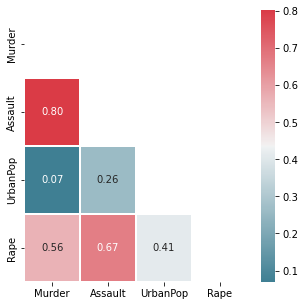

In [10]:
def corr_heatmap(df):
    
  # get correlations
  corrs = df.corr()

  # Sets colour of heatmap  
  colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
  # Plot figsize
  fig, ax = plt.subplots(figsize=(5, 5))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df_scaled)

- 'Assault' has a relatively high correlations (k > 50) with 'Rape' and 'Murder'. 
- 'Urbanpop' has moderate correlations with 'Rape' and 'Assault' (10 < k < 50) 
- 'Urbanpop' as minimal correlations with 'Murder' (k ~ 0)

# Principal Component Analysis (PCA)

We use PCA for dimnesionality reduction. This decision will be determined using the Scree plot and Cumulative Variance Explained Plot below. Currently, there are four dimensions for this dataset

Text(0, 0.5, 'Variance Explained')

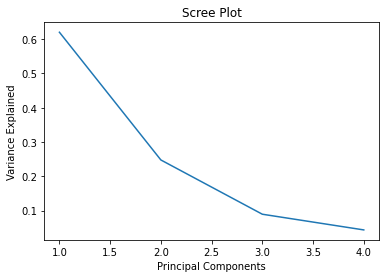

In [11]:
# define PCA model to use

pca = PCA(n_components=4)

#fit PCA model to data
pca_fit = pca.fit(df_scaled)

# array for axis
PC_values = np.arange(pca.n_components_) + 1

#Plot Graph
sns.lineplot(x = PC_values, y = pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')


In [12]:
# Variance value for each principal component
print(pca.explained_variance_ratio_)

[0.62006039 0.24744129 0.0891408  0.04335752]


Text(0, 0.5, ' Cumulative Explained Variance')

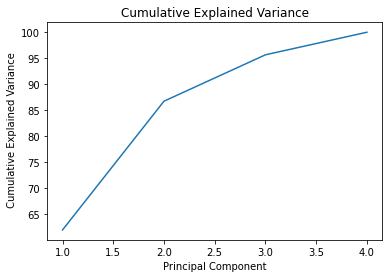

In [13]:
#Plot Cumulative Explained Variance graph

sns.lineplot(x = PC_values, y = np.cumsum(pca.explained_variance_ratio_)*100)

plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel(' Cumulative Explained Variance')

For each graph (i.e. scree plot and cuimulative explained variance), the x-axis displays the principal component number and the y-axis displays the percentage of total or cumulative total variance explained by each individual principal component.

As shown in the graph values, the first two principal components make almost 90% of the variation of the set. Therefore the number of components will be two.

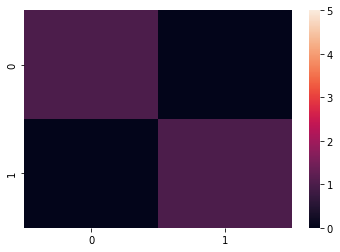

In [14]:
# choose number of components to be generated based on the above
nr_comps = 2
pca = PCA(n_components = nr_comps)

# obtain components
principal_components = pca.fit_transform(df_scaled)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index = df_scaled.index)

# plot correlation map
ax = sns.heatmap(pca_df.corr(), 0, 5)
plt.show()


The heat map of the PCA parameters indicates that the 2 component PCA generated (2 new variables) are uncorrelated components and therefore more components are not required. 

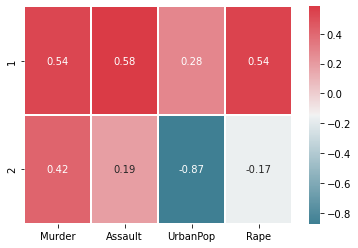

In [15]:
# Sets colour of heatmap  
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Determine the significance of feature to principal components
components = pd.DataFrame(pca.components_, columns = df.columns[1:]
                         , index = [1,2])

ax = sns.heatmap(components,cmap=colormap,
                 linewidth=1.8, annot = True)

The heatmap shows the correlation of the feature components with the two principal components using standardised data. 

The feature components, 'UrbanPop' has the relatively highest correlation with the 2nd principle component. Additionally, it is the only correlation which is negative. Therefore, one can argue that 'Urbanpop' is the most feature within the data set.

All the feature components have a postive correlation with the first principle component. In particular, 'Murder, 'Assault' and 'Rape' had signficant postive correlations with 1st principal component (k > 50)

'Rape' and 'Assault' had a miminal relationship with second principle component (i.e. k~0)

Overall, the features are more affected by the 1st principal component

# Cluster Models

We will perform both Hierarchical Clustering and K-means to this data and conduct a comparison afterwards. 

We will use the PCA dataframe from the previous section

## Kmeans

To determine the amount of clusters we can use the elbow method

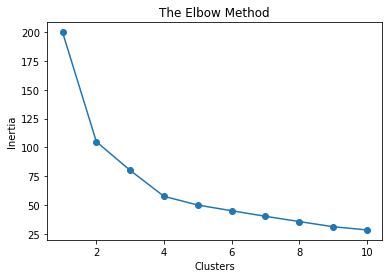

In [16]:
#Elbow Method

def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    
    plt.title('The Elbow Method')
    plt.xlabel('Clusters')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)


The elbow runs from k=2 to k=5. It is not apparent which value within the elbow is the most optimal, Therefore, we can determine the  silhouette score with cluster number as the independent variable to determine the appropriate value. 

Cluster:  2 
Score:  0.476


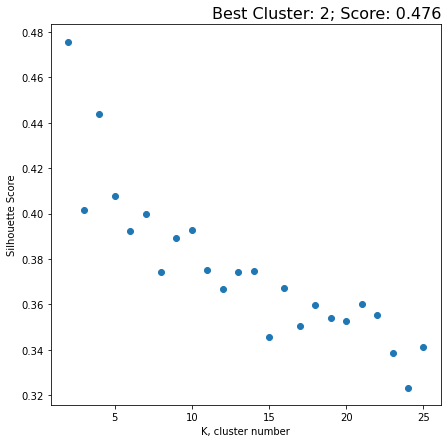

In [17]:
# K Sensitivity analysis

"""
Function which shows the silhouette scores of a cluster range
in scatter plot form. 

Variables:

Kmin - min. clusters
Kmax - Max clusters
X - Dataset
"""

def sens_analysis(K_min, K_max, X):
    
    # Stores silhouette score
    score ={}
    for K in range(K_min, K_max +1):
        
        #Kmmeans model
        model = KMeans(n_clusters = K, init = 'k-means++', random_state = 123)
        y_preds = model.fit_predict(X)
        
        #Determines score
        score[K] = silhouette_score(X, model.labels_, metric = 'euclidean')
    
    #Finding max silhouette score
    for key, value in score.items():
         if score[key] == max(score.values()):
             print("Cluster: ", key, "\nScore: ", round(value,3))
             a = f"Best Cluster: {key}; Score: {round(value,3)}"
        
    
    #prints scatter plot
    plt.subplots(1, 1, figsize = (7, 7))
    plt.scatter(x = list(score.keys()), y = list(score.values()))
    plt.title(a, loc='right', fontdict={'fontsize': 16})
    plt.xlabel('K, cluster number')
    plt.ylabel('Silhouette Score')
   
'''
25 is the max number clusters you make so the 
data can form a group i.e. pair
'''

sens_analysis(2, 25, pca_df)

The K-Means clustering sensitivity analysis shows that the best silhouette score (0.476) will occur with 2 clusters i.e. k = 2

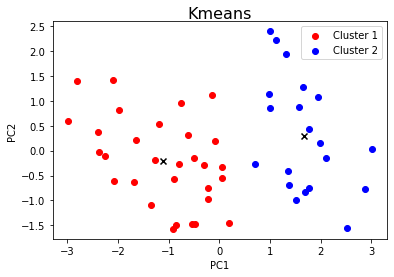

In [26]:
# Generate cluster plot for KMeans

def plot_Kmeans(x, k):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 123)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    k = kmeans.n_clusters
    for c in range(k):
        xp = x[y_pred == c]
        plt.plot(figsize = (10, 10))
        plt.scatter(xp[0], xp[1], c = colours[c], label = 'Cluster {}'.format(c+1))
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker = 'x', c = 'black')
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'),3)
    plt.title('Kmeans', fontdict={'fontsize': 16}, pad = -14)
    plt.legend()

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()
plot_Kmeans(pca_df, 2)

# Agglomerative Clustering

To fine tune the clustering using agglomerative, two different linkage criterion will be investigated. This is average and complete linkage. These were chosen as they tend to provide graphs that are more 'balanced'

In [19]:
# K Sensitivity analysis

"""
Function which shows the silhouette scores of a cluster range
in scatter plot form. 

Variables:

Kmin - min. clusters
Kmax - Max clusters
X - Dataset
link - linkage criterion (average of complete)
"""
def sens_analysis(K_min, K_max, X, link):
    score ={}
    for K in range(K_min, K_max +1):
        
# Create cluster
        model = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = link)
        y_preds = model.fit_predict(X)     
        
        score[K] = silhouette_score(X, model.labels_)
    
#     Finding max silhouette score which is used as title   
    for key, value in score.items():
         if score[key] == max(score.values()):
             title = f"Best Cluster: {key}; Score: {round(value,2)}"
    
#     prints scatter plot
    plt.subplots(1, 1, figsize = (7, 7))
    plt.scatter(x = list(score.keys()), y = list(score.values()))
    plt.title(title+"; Linkage: "+link, loc='right', fontdict={'fontsize': 16})
    plt.xlabel('K, cluster number')
    plt.ylabel('Silhouette Score')
    

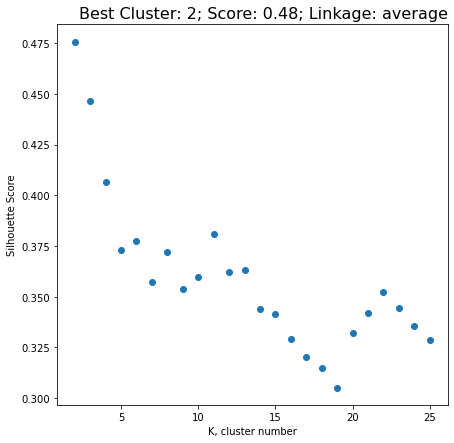

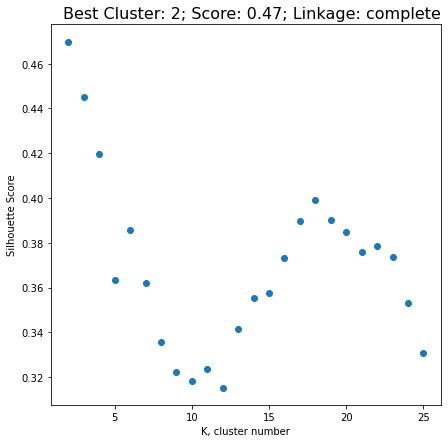

In [20]:
# displays both graphs
for method in ('average', 'complete'):
    sens_analysis(2, 25, pca_df, method)

By comparing the two scatterplots, it shows that the Agglomerative Clustering using the average linkage had the highest silhouette score (0,48)

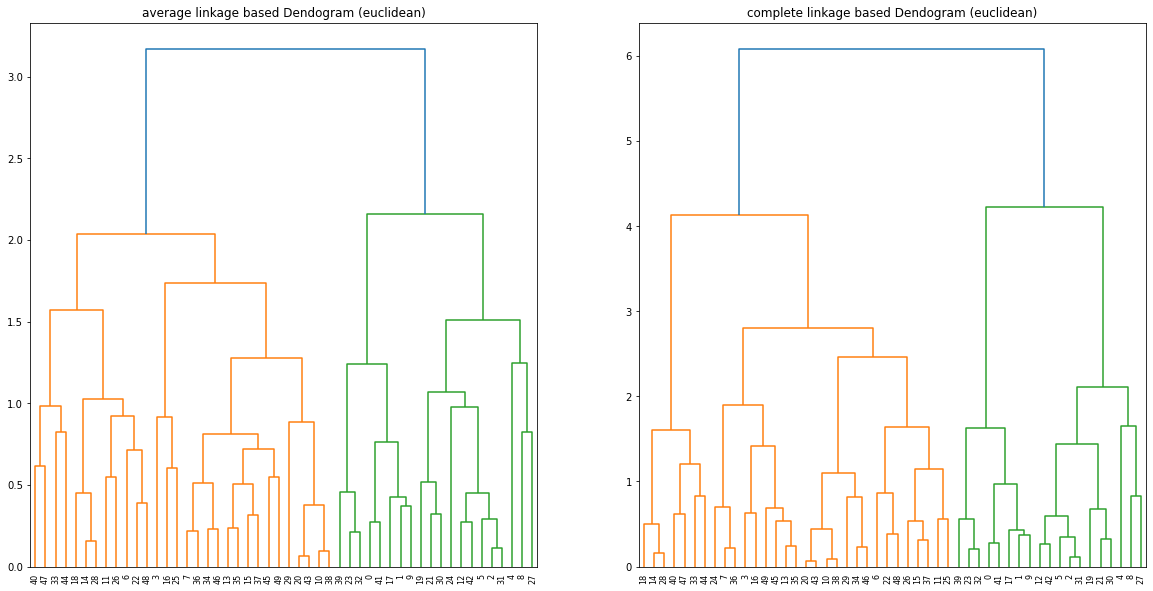

In [21]:
# Plot dendograms
# Choose methods and geometries to be evaluated

method = ['average', 'complete']

fig, axes = plt.subplots(1, 2, figsize = (20, 10))

# subplot count
cnt = 1

for meth in method: 
    plt.subplot(1, 2, cnt)
    cnt += 1
    plt.title(meth + ' linkage based Dendogram (' + 'euclidean' + ')')  
    dend = dendrogram(linkage(pca_df, method = meth, metric = 'euclidean')) 

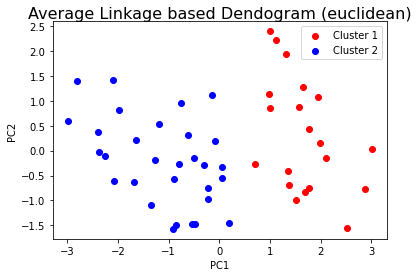

In [34]:
# Generate cluster plot for Agglomerative Clustering

def plot_Kmeans(x, k):
    model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
    y_pred = model.fit_predict(x)
    colours = 'rbgcmy'
    k = model.n_clusters
    for c in range(k):
        xp = x[y_pred == c]
        plt.plot(figsize = (10, 10))
        plt.scatter(xp[0], xp[1], c = colours[c], label = 'Cluster {}'.format(c+1))
    score = round(silhouette_score(x, model.labels_, metric='euclidean'),3)
    plt.title('Average Linkage based Dendogram (euclidean)', fontdict={'fontsize': 16}, pad = -14)
    plt.legend()

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()
    
plot_Kmeans(pca_df, 2)

# Summary

In this task, we investigated the differences between arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas. This was conducted using unsupervised learning methods such as Principal Component Analysis (PCA) and various clustering techniques.

PCA resulted in the dataset reducing to two principcal components (PC). 
Both the Agglomerative Clustering method and the kmeans method had a recommended cluster size of 2. However, the Agglomerative Clustering method had the higher silhouette score. 

Results showed that PC1 had a positive correlation to all the features in the dataset. Most notably, 'Rape', 'Assault' and 'Murder'. For PC2, the only significant relationship it had was with one feature, 'UrbanPop' and it was a negative correlation.

On the scatter graphs, The first cluster data points all had positive PC1 values and PC2 values which range from -1.5 to 2.5. The postive PC1 values suggests that for this cluster, the arrests are mainly attributed to 'Rape', 'Assault' and 'Murder'. 

The second cluster data points mainly had negative PC1 values and majority negative PC2 values. This suggests that for this cluster, the arrests are mainly attributed to a high percentage of the population living in urban areas.


# References
https://www.youtube.com/watch?v=A_P7X4H9wOc  
https://www.statology.org/scree-plot-python/  
https://stats.stackexchange.com/questions/311908/what-is-pca-components-in-sk-learn  
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html    
https://www.youtube.com/watch?v=FgakZw6K1QQ&list=LL&index=1   
https://www.youtube.com/watch?v=e_8BIW0f7Ck&list=LL&index=2  